In [1]:
from Oracle1Generator import Oracle1
from Oracle2Generator import Oracle2
from Diffuser import diffuser
from qiskit.circuit.library import GroverOperator
from qiskit import *
from qiskit.algorithms import AmplificationProblem
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [2]:
def oracle(q,n,M,x,up) :
    cmp =0
    for i in range(1,N):
        cmp+=i
    nqubits = N*n+2*q+q*(M-1)*(N)+2*q+3+n+cmp+2
    qRegister = QuantumRegister(nqubits)
    qc = QuantumCircuit(qRegister) 
    qc.append(Oracle1(q,n,M,x,up),[i for i in range(N*n+q*(M-1)*(N)+4*q+2)]+[nqubits-3])
    if n== 1:
        qc.append(position_xor(n),)
    qc.append(Oracle2(N,n),[i for i in range(N*n)]+[i for i in range(N*n+q*(M-1)*(N)+4*q+2,N*n+q*(M-1)*(N)+4*q+2+n+cmp)]+[nqubits-2])
    qc.ccx(qRegister[nqubits-3],qRegister[nqubits-2],qRegister[nqubits-1])
    #reversibility
    qc.append(Oracle1(q,n,M,x,up).inverse(),[i for i in range(N*n+q*(M-1)*(N)+4*q+2)]+[nqubits-3])
    qc.append(Oracle2(N,n).inverse(),[i for i in range(N*n)]+[i for i in range(N*n+q*(M-1)*(N)+4*q+2,N*n+q*(M-1)*(N)+4*q+2+n+cmp)]+[nqubits-2])
    U_oracle = qc.to_gate()
    U_oracle.name = "Oracle"
    return  U_oracle 

In [3]:
def Grover(q,n,M,x,up,iteration):
    cmp =0
    for i in range(1,2**n):
        cmp+=i
    nqubits = N*n+2*q+q*(M-1)*(N)+2*q+3+n+cmp+2
    qRegister = QuantumRegister(nqubits)
    qc=QuantumCircuit(qRegister)
    #state preparation
    qc.h([i for i in range(n*N)])
    qc.x(-1)
    qc.h(-1)
    #GroverIteration
    for it in range(iteration):
        qc.append(oracle(q,n,M,x,up),qc.qubits) #append the oracle and its inverse
        qc.append(diffuser(n*N),[i for i in range(n*N)]) #append the diffuser 
    qc.draw('mpl')
    U_Grover = qc.to_gate()
    U_Grover.name = "Grover"
    return  U_Grover

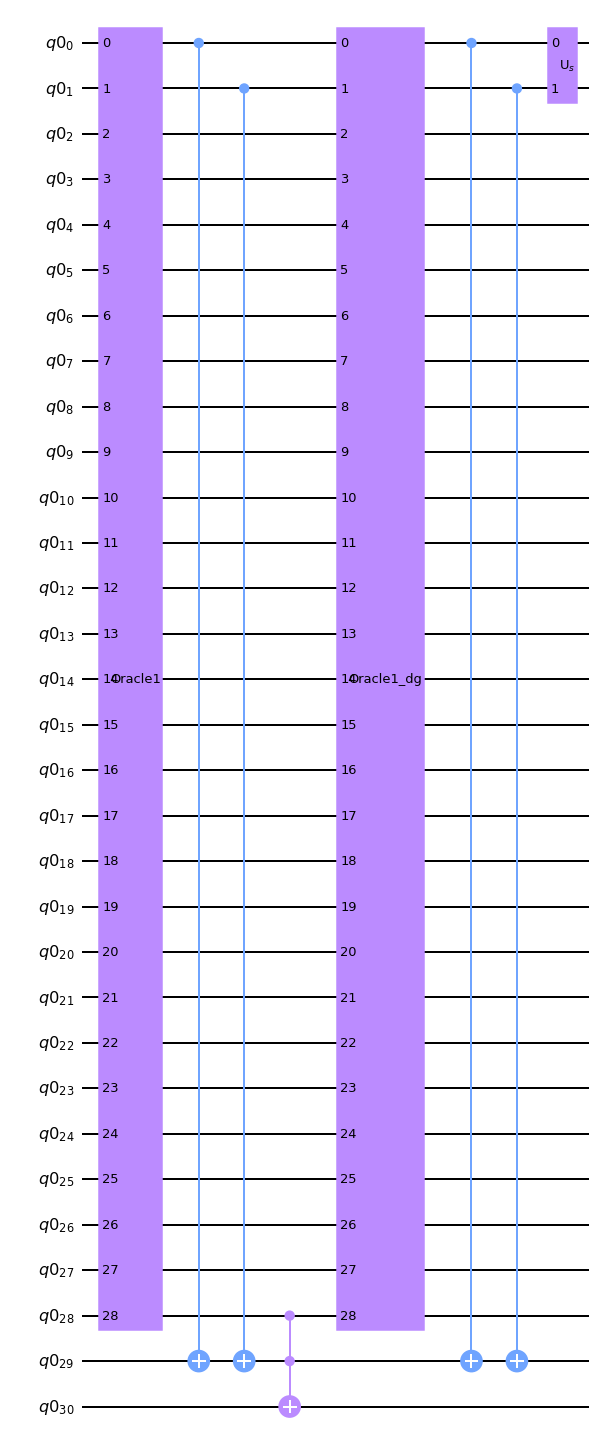

In [4]:
n=1
N=2**n
M=2
q=4
x = [[2,1,1,1],[3,4,1,1],[2,4,1,1]]
up=8
cmp =0
cmp =0
if n != 1 :
    cmp= 2**(n-1)*(N-1)
    nqubits = N*n+2*q+q*(M-1)*(N)+2*q+3+n+cmp+2
    qRegister = QuantumRegister(nqubits)
    qc = QuantumCircuit(qRegister) 
    qc.append(Oracle1(q,n,M,x,up),[i for i in range(N*n+q*(M-1)*(N)+4*q+2)]+[nqubits-3])
    qc.append(Oracle2(N,n),[i for i in range(N*n)]+[i for i in range(N*n+q*(M-1)*(N)+4*q+2,N*n+q*(M-1)*(N)+4*q+2+n+cmp)]+[nqubits-2])
    qc.ccx(qRegister[nqubits-3],qRegister[nqubits-2],qRegister[nqubits-1])
    #reversibility
    qc.append(Oracle1(q,n,M,x,up).inverse(),[i for i in range(N*n+q*(M-1)*(N)+4*q+2)]+[nqubits-3])
    qc.append(Oracle2(N,n).inverse(),[i for i in range(N*n)]+[i for i in range(N*n+q*(M-1)*(N)+4*q+2,N*n+q*(M-1)*(N)+4*q+2+n+cmp)]+[nqubits-2])
else :  #when N=2 we can reduce the size of the circuit  
    nqubits = N*n+2*q+q*(M-1)*(N)+2*q+3+2
    qRegister = QuantumRegister(nqubits)
    qc = QuantumCircuit(qRegister) 
    qc.append(Oracle1(q,n,M,x,up),[i for i in range(N*n+q*(M-1)*(N)+4*q+2)]+[nqubits-3])
    qc.cx(0,nqubits-2)
    qc.cx(1,nqubits-2)
    qc.ccx(qRegister[nqubits-3],qRegister[nqubits-2],qRegister[nqubits-1])
    #reversibility
    qc.append(Oracle1(q,n,M,x,up).inverse(),[i for i in range(N*n+q*(M-1)*(N)+4*q+2)]+[nqubits-3])
    qc.cx(0,[nqubits-2])
    qc.cx(1,[nqubits-2])
qc.append(diffuser(n*N),[i for i in range(n*N)])    
qc.draw('mpl')

In [5]:
def GroverOperator(problem)-> QuantumCircuit:
    n=problem.num_qubits_job
    N=2**(n)
    q=problem.num_qubits_cimj
    x=problem.Pm
    m=problem.num_machine
    if n != 1 :
        cmp= 2**(n-1)*(N-1)
        nqubits = N*n+2*q+q*(M-1)*(N)+2*q+3+n+cmp+2
        qRegister = QuantumRegister(nqubits)
        qc = QuantumCircuit(qRegister) 
        qc.append(Oracle1(q,n,M,x,up),[i for i in range(N*n+q*(M-1)*(N)+4*q+2)]+[nqubits-3])
        qc.append(Oracle2(N,n),[i for i in range(N*n)]+[i for i in range(N*n+q*(M-1)*(N)+4*q+2,N*n+q*(M-1)*(N)+4*q+2+n+cmp)]+[nqubits-2])
        qc.ccx(qRegister[nqubits-3],qRegister[nqubits-2],qRegister[nqubits-1])
        #reversibility
        qc.append(Oracle1(q,n,M,x,up).inverse(),[i for i in range(N*n+q*(M-1)*(N)+4*q+2)]+[nqubits-3])
        qc.append(Oracle2(N,n).inverse(),[i for i in range(N*n)]+[i for i in range(N*n+q*(M-1)*(N)+4*q+2,N*n+q*(M-1)*(N)+4*q+2+n+cmp)]+[nqubits-2])
    else :  #when N=2 we can reduce the size of the circuit  
        nqubits = N*n+2*q+q*(M-1)*(N)+2*q+3+2
        qRegister = QuantumRegister(nqubits)
        qc = QuantumCircuit(qRegister) 
        qc.append(Oracle1(q,n,M,x,up),[i for i in range(N*n+q*(M-1)*(N)+4*q+2)]+[nqubits-3])
        qc.cx(0,nqubits-2)
        qc.cx(1,nqubits-2)
        qc.ccx(qRegister[nqubits-3],qRegister[nqubits-2],qRegister[nqubits-1])
        #reversibility
        qc.append(Oracle1(q,n,M,x,up).inverse(),[i for i in range(N*n+q*(M-1)*(N)+4*q+2)]+[nqubits-3])
        qc.cx(0,[nqubits-2])
        qc.cx(1,[nqubits-2])
    qc.append(diffuser(n*N),[i for i in range(n*N)])
    qc.name="Grover_op"
    return qc      

In [6]:
class problem:
    def __init__(self,num_qubits_job,num_qubits_cimj,Pm :[],num_machine):
        self.num_qubits_job=num_qubits_job
        self.num_qubits_cimj=num_qubits_cimj
        self.Pm=Pm
        self.num_machine=num_machine
        
        

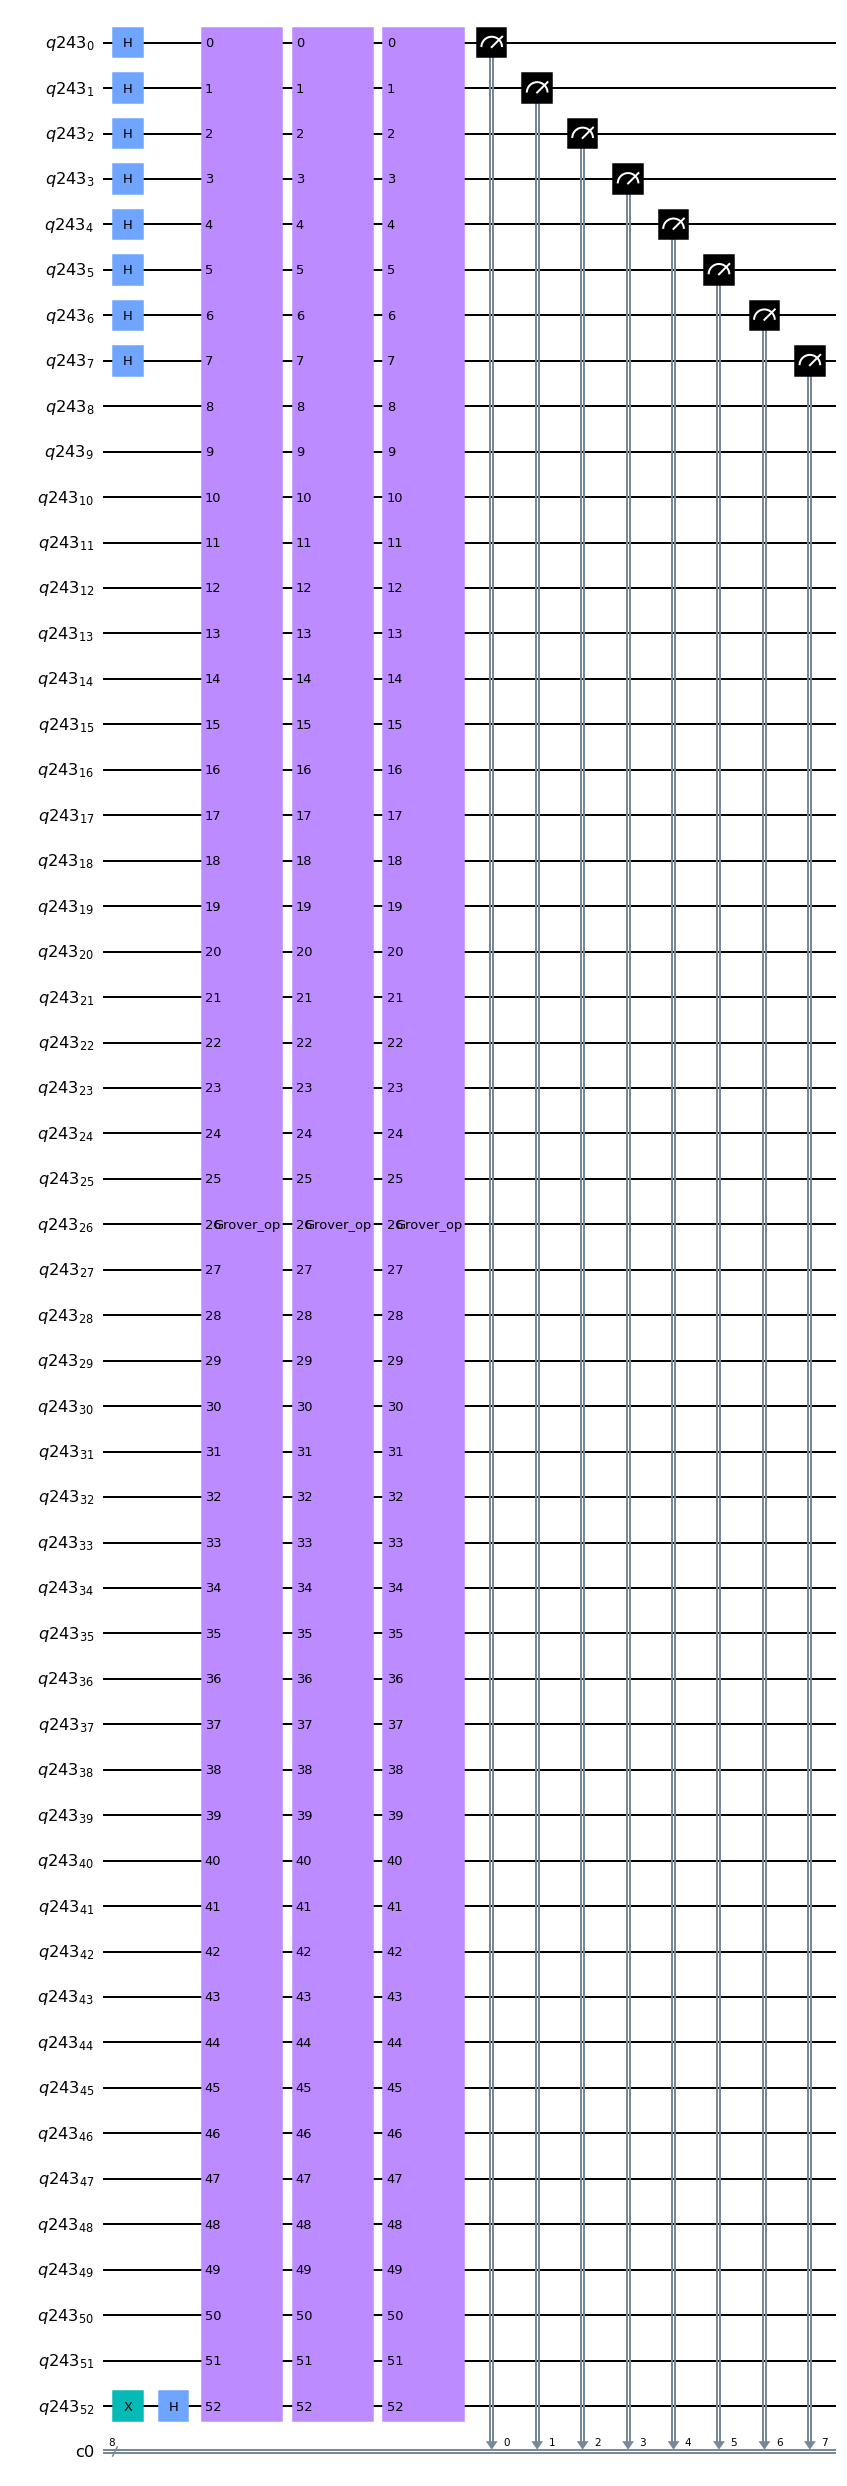

In [8]:
pr = problem(2,4,[[2,1,1,1],[3,4,1,1],[2,4,1,1]],2)   
n=pr.num_qubits_job
N=2**(n)
q=pr.num_qubits_cimj
x=pr.Pm
m=pr.num_machine
if n == 1 :
    nqubits = N*n+2*q+q*(M-1)*(N)+2*q+3+2
    qRegister = QuantumRegister(nqubits)
    qc = QuantumCircuit(qRegister) 
else :
    cmp= 2**(n-1)*(N-1)
    nqubits = N*n+2*q+q*(M-1)*(N)+2*q+3+n+cmp+2
    qRegister = QuantumRegister(nqubits)
    qc = QuantumCircuit(qRegister)                 
#state preparation
qc.h([i for i in range(n*N)])
qc.x(-1)
qc.h(-1)
#Grover operator
Grover_op= GroverOperator(pr)
for i in range(3):
    qc.append(Grover_op,qc.qubits)
measurement_cr = ClassicalRegister(n*N)
qc.add_register(measurement_cr)
qc.measure([i for i in range(n*N)], measurement_cr)    
qc.draw('mpl')

In [ ]:
def memoryEstimation(q,n,M,cmp):
    N=2**n
    requiredQubits=N*n+2*q+q*(M-1)*(N)+2*q+3+n+cmp+2
    requiredMemorySpace = 2**requiredQubits *32/(1024*1024*1024)
    return [requiredQubits,requiredMemorySpace]

In [ ]:
n=1
N=2**n
M=2
q=4
cmp = 0
for i in range(1,N):
    cmp+=i
memoryEstimation(q,n,M,cmp)